In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pickle


In [2]:
market_data=pd.read_csv('Final_Market.csv')

In [3]:
market_data.head()

,Unnamed: 0,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,year,month,day,Selling_Price
0,0,CAPE,EC120,1L,12.0,APPLE GRANNY SMITH,2020/03/10,108.0,112.0,3236.0,29,348.0,0,9.3,2020,3,10,111.5862069
1,1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020/09/09,150.0,170.0,51710.0,332,6075.6,822,8.51,2020,9,9,155.753012
2,2,GAUTENG,AT200,1L,20.0,AVOCADO PINKERTON,2020/05/05,70.0,80.0,4860.0,66,1320.0,50,3.68,2020,5,5,73.63636364
3,3,TRANSVAAL,BJ090,1L,9.0,TOMATOES-LONG LIFE,2020/01/20,60.0,60.0,600.0,10,90.0,0,6.67,2020,1,20,60
4,4,WESTERN FREESTATE,PP100,1R,10.0,POTATO SIFRA (WASHED),2020/07/14,40.0,45.0,41530.0,927,9270.0,393,4.48,2020,7,14,44.8004315


In [4]:
market_data.tail()

,Unnamed: 0,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,year,month,day,Selling_Price
64370,64371,TRANSVAAL,AG100,1M,10.0,ONIONS MILD,2020/05/18,70.0,75.0,19695.0,281,2810.0,3583,7.01,2020,5,18,70.08896797
64371,64372,IMPORTS - OUTSIDE RSA,BC180,X,18.0,BANANA,2020/02/05,160.0,220.0,13560.0,72,1296.0,887,10.46,2020,2,5,188.3333333
64372,64373,TRANSVAAL,TS035,1M,3.5,TOMATOES-LONG LIFE,2020/08/20,20.0,20.0,6000.0,300,1050.0,900,5.71,2020,8,20,20
64373,64374,NATAL,BJ100,2M,10.0,LEMON,2020/08/18,50.0,80.0,16730.0,277,2770.0,372,6.04,2020,8,18,60.39711191
64374,64375,CAPE,M4183,1L,18.3,APPLE FUJI,2020/08/06,150.0,150.0,150.0,1,18.3,1,8.2,2020,8,6,150


In [5]:
market_data['Date'].min()

'2019/12/11'

In [6]:
market_data['Date'].max()

'2020/10/03'

In [7]:
market_data.shape

(64375, 18)

In [8]:
market_data.describe()

,Unnamed: 0,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,year,month,day
count,64375.000000,64375.000000,64375.000000,64375.000000,6.437500e+04,64375.000000,64375.000000,64375.000000,64375.000000,64375.000000,64375.000000
mean,32187.602563,12.781682,75.652275,89.608411,1.939514e+04,446.111332,3336.693126,477.653748,2019.967456,5.130687,15.663208
std,18584.020925,35.943324,159.509360,172.224457,4.442225e+04,1184.177650,7682.343854,1453.902164,0.177440,2.819090,8.633300
min,0.000000,0.120000,1.000000,1.000000,-5.770000e+04,-595.000000,-5040.000000,-512.000000,2019.000000,1.000000,1.000000
25%,16093.500000,7.000000,30.000000,35.000000,1.154000e+03,20.000000,175.000000,0.000000,2020.000000,3.000000,9.000000
50%,32188.000000,10.000000,46.000000,55.000000,5.400000e+03,107.000000,940.000000,76.000000,2020.000000,5.000000,15.000000
75%,48281.500000,11.000000,80.000000,100.000000,1.877200e+04,390.000000,3250.000000,381.000000,2020.000000,7.000000,23.000000
max,64375.000000,500.000000,4400.000000,4400.000000,1.134701e+06,39453.000000,192230.000000,93193.000000,2020.000000,12.000000,31.000000


In [9]:
market_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64375 entries, 0 to 64374
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        64375 non-null  int64  
 1   Province          64375 non-null  object 
 2   Container         64375 non-null  object 
 3   Size_Grade        64375 non-null  object 
 4   Weight_Kg         64375 non-null  float64
 5   Commodities       64375 non-null  object 
 6   Date              64375 non-null  object 
 7   Low_Price         64375 non-null  float64
 8   High_Price        64375 non-null  float64
 9   Sales_Total       64375 non-null  float64
 10  Total_Qty_Sold    64375 non-null  int64  
 11  Total_Kg_Sold     64375 non-null  float64
 12  Stock_On_Hand     64375 non-null  int64  
 13  avg_price_per_kg  64375 non-null  object 
 14  year              64375 non-null  int64  
 15  month             64375 non-null  int64  
 16  day               64375 non-null  int64 

In [10]:
#drop columns
market_data.drop(['Unnamed: 0','Selling_Price'], axis=1 , inplace=True)

In [11]:
market_data['Size_Grade'].unique()

array(['1L', '1R', '2M', '1M', '2X', '3L', '2L', 'M', '1S', '1', 'L',
       '1Z', '2S', '2Z', '2', '1X', '3S', '4M', 'X', '1U', '3M', '4S',
       '1G', '1A', '2R', '1B', '2C', '3R', '2U', '0', '3Z', '2B', '2A',
       '1C', '2G', 'S', '4R', '3U', '4Z', '4L', '0M', 'G', '3X', '4U',
       '3G', 'U', '4X'], dtype=object)

In [12]:
market_data.isnull().sum()

Province            0
Container           0
Size_Grade          0
Weight_Kg           0
Commodities         0
Date                0
Low_Price           0
High_Price          0
Sales_Total         0
Total_Qty_Sold      0
Total_Kg_Sold       0
Stock_On_Hand       0
avg_price_per_kg    0
year                0
month               0
day                 0
dtype: int64

In [13]:
#check duplicated rows
market_data.duplicated().sum()

0

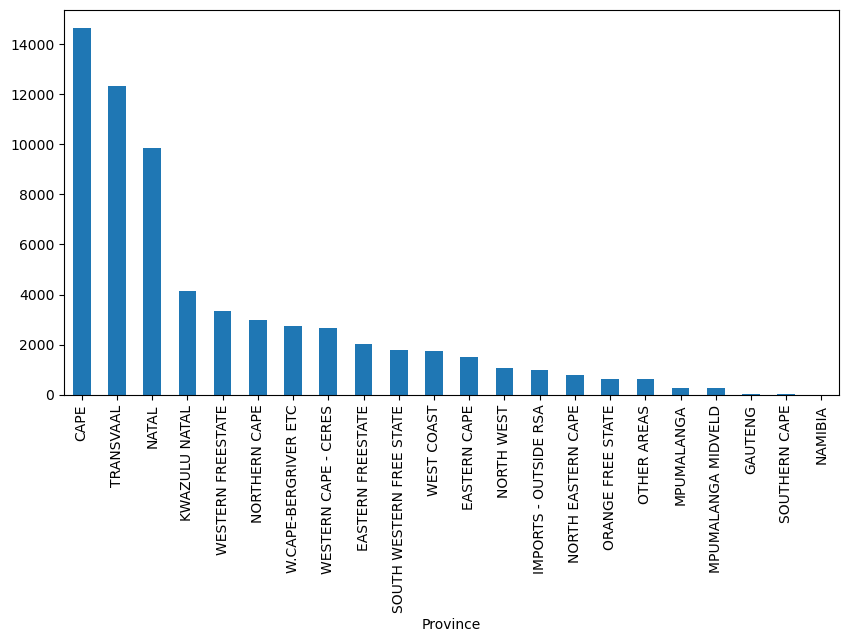

In [14]:
plt.figure(figsize=(10,5)) 
market_data['Province'].value_counts().plot(kind='bar')
plt.show()

In [15]:
market_data.columns

Index(['Province', 'Container', 'Size_Grade', 'Weight_Kg', 'Commodities',
       'Date', 'Low_Price', 'High_Price', 'Sales_Total', 'Total_Qty_Sold',
       'Total_Kg_Sold', 'Stock_On_Hand', 'avg_price_per_kg', 'year', 'month',
       'day'],
      dtype='object')

The best 5 commodities

In [16]:
market_data['Commodities'].value_counts().head(5)

Commodities
POTATO (WASHED) MONDIAL    4134
TOMATOES-LONG LIFE         3849
ONIONS BROWN               3419
POTATO SIFRA (WASHED)      3092
ONIONS MILD                2714
Name: count, dtype: int64

ONION BROWN DATA

In [17]:
#filter for only for onion brown commodity, which will be use to build model
brown_onion_df=market_data[market_data['Commodities']=='ONIONS BROWN']
brown_onion_df

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,year,month,day
19,NORTHERN CAPE,AG100,1M,10.0,ONIONS BROWN,2020/02/06,42.0,45.0,2580.0,58,580.0,132,4.45,2020,2,6
33,WESTERN CAPE - CERES,AF070,2L,7.0,ONIONS BROWN,2020/02/03,24.0,32.0,4666.0,187,1309.0,1042,3.56,2020,2,3
42,WESTERN CAPE - CERES,AG100,1R,10.0,ONIONS BROWN,2020/07/20,70.0,72.0,372402.0,5320,53200.0,152,7,2020,7,20
45,WEST COAST,AG100,1M,10.0,ONIONS BROWN,2020/02/25,55.0,65.0,106961.0,1764,17640.0,128,6.06,2020,2,25
72,WESTERN CAPE - CERES,AC030,1L,3.0,ONIONS BROWN,2020/04/28,23.0,24.0,39480.0,1710,5130.0,2496,7.7,2020,4,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64192,WEST COAST,AF070,3L,7.0,ONIONS BROWN,2020/07/01,32.0,32.0,5024.0,157,1099.0,0,4.57,2020,7,1
64320,NORTHERN CAPE,AF070,2M,7.0,ONIONS BROWN,2020/02/06,24.0,24.0,24.0,1,7.0,307,3.43,2020,2,6
64351,WESTERN CAPE - CERES,AB020,1Z,2.0,ONIONS BROWN,2020/08/04,16.0,17.0,4970.0,310,620.0,230,8.02,2020,8,4
64354,NORTHERN CAPE,AG100,2M,10.0,ONIONS BROWN,2020/02/05,15.0,25.0,525.0,29,290.0,202,1.81,2020,2,5


In [18]:
com_sales=brown_onion_df.groupby(['Date','Stock_On_Hand','Low_Price'])['Sales_Total'].mean().sort_values(ascending=False)

com_sales

Date        Stock_On_Hand  Low_Price
2020/07/01  460            25.0         1012666.0
2020/07/09  1657           25.0          941126.0
            570            48.0          718636.0
2020/07/01  120            48.0          655276.0
2020/07/09  5890           30.0          644326.0
                                          ...    
2020/03/13  1049           18.0              18.0
2020/03/12  1049           18.0              18.0
2020/02/26  22             10.0              10.0
2020/02/27  22             10.0              10.0
2020/04/22  2520           24.0          -15660.0
Name: Sales_Total, Length: 3261, dtype: float64

In [19]:
brown_onion_df['avg_price_per_kg'].unique()

array(['4.45', '3.56', '7', '6.06', '7.7', '5.19', '8', '3.67', '4.55',
       '8.03', '4.5', '2.5', '4.8', '5.93', '6.29', '4.23', '5.94',
       '7.67', '4.71', '6.9', '8.35', '6', '8.1', '4.29', '4.2', '3',
       '5.12', '6.76', '5', '4.59', '4.35', '10', '5.71', '6.53', '6.5',
       '8.5', '6.17', '5.57', '5.98', '6.23', '5.6', '3.87', '4.92', '9',
       '3.48', '5.43', '4.02', '6.87', '4.53', '5.75', '2.04', '4.46',
       '4.54', '3.52', '8.2', '5.48', '7.53', '5.33', '6.15', '4.94',
       '6.49', '4.57', '6.79', '3.01', '4.9', '5.5', '5.87', '6.98',
       '2.93', '4.68', '2', '4.31', '4.26', '3.06', '2.7', '5.69', '2.99',
       '5.2', '4.97', '3.28', '5.18', '5.52', '6.42', '6.97', '3.88',
       '7.89', '6.71', '4.19', '6.55', '4.37', '8.3', '7.5', '4', '4.86',
       '1.43', '4.01', '7.74', '4.96', '3.71', '5.14', '5.27', '6.05',
       '4.61', '1.2', '6.6', '7.14', '7.66', '4.93', '4.6', '4.84', '5.4',
       '3.51', '9.19', '4.65', '6.34', '4.67', '5.37', '3.14', '6.94

In [20]:
brow_onion_sizes=brown_onion_df.groupby(['Size_Grade','Weight_Kg'])['Low_Price'].sum()
brow_onion_sizes

Size_Grade  Weight_Kg
1L          3.0           2370.00
            7.0           4471.00
            10.0          8496.00
1M          1.0            523.50
            2.0           1593.00
            3.0           2093.00
            5.0            182.00
            7.0           6383.00
            10.0         15473.00
1R          1.0             16.00
            3.0             32.00
            7.0           6092.00
            10.0         13896.00
1S          1.0              1.00
            7.0              5.00
            10.0          4882.00
1X          7.0            759.00
            10.0          2517.00
1Z          1.0             30.50
            2.0            839.00
            3.0           1053.50
            7.0           6004.84
            10.0          9697.50
            20.0          2130.00
2L          7.0           2319.50
            10.0          2709.00
2M          3.0             36.00
            7.0           3991.50
            10.0          

In [21]:
brown_onion_df['Low_Price'].value_counts()

Low_Price
30.0     239
40.0     227
20.0     176
50.0     166
45.0     123
        ... 
150.0      1
1.0        1
3.5        1
11.0       1
67.0       1
Name: count, Length: 94, dtype: int64

In [22]:
brown_onion_df['Province'].unique()

array(['NORTHERN CAPE', 'WESTERN CAPE - CERES', 'WEST COAST',
       'SOUTH WESTERN FREE STATE', 'WESTERN FREESTATE', 'NATAL',
       'KWAZULU NATAL', 'OTHER AREAS', 'TRANSVAAL'], dtype=object)

In [23]:
brown_onion_df['avg_price_per_kg']=pd.to_numeric(brown_onion_df['avg_price_per_kg'])

/var/folders/xj/qjfhk96916g02kgmhsq_wqq80000gp/T/ipykernel_10346/3058600101.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brown_onion_df['avg_price_per_kg']=pd.to_numeric(brown_onion_df['avg_price_per_kg'])


In [24]:
brown_onion_df['avg_price_per_kg'].mean()

5.294121088037437

In [25]:
brown_onion_df.drop('Date', axis=1,inplace=True)

/var/folders/xj/qjfhk96916g02kgmhsq_wqq80000gp/T/ipykernel_10346/2249559638.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brown_onion_df.drop('Date', axis=1,inplace=True)


In [26]:
brown_onion_df.dtypes

Province             object
Container            object
Size_Grade           object
Weight_Kg           float64
Commodities          object
Low_Price           float64
High_Price          float64
Sales_Total         float64
Total_Qty_Sold        int64
Total_Kg_Sold       float64
Stock_On_Hand         int64
avg_price_per_kg    float64
year                  int64
month                 int64
day                   int64
dtype: object

identify and remove outliers in AVERAGE PRICE PER KG COLUMN

In [27]:
brown_onion_df['avg_price_per_kg'].value_counts().sort_values(ascending=False)

avg_price_per_kg
7.00    123
5.00     99
6.00     93
8.00     80
4.00     70
       ... 
7.94      1
3.95      1
0.88      1
8.64      1
2.68      1
Name: count, Length: 649, dtype: int64

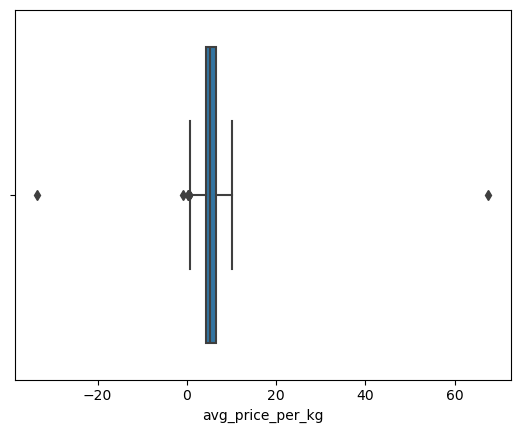

In [28]:
sns.boxplot(x=brown_onion_df['avg_price_per_kg'])
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

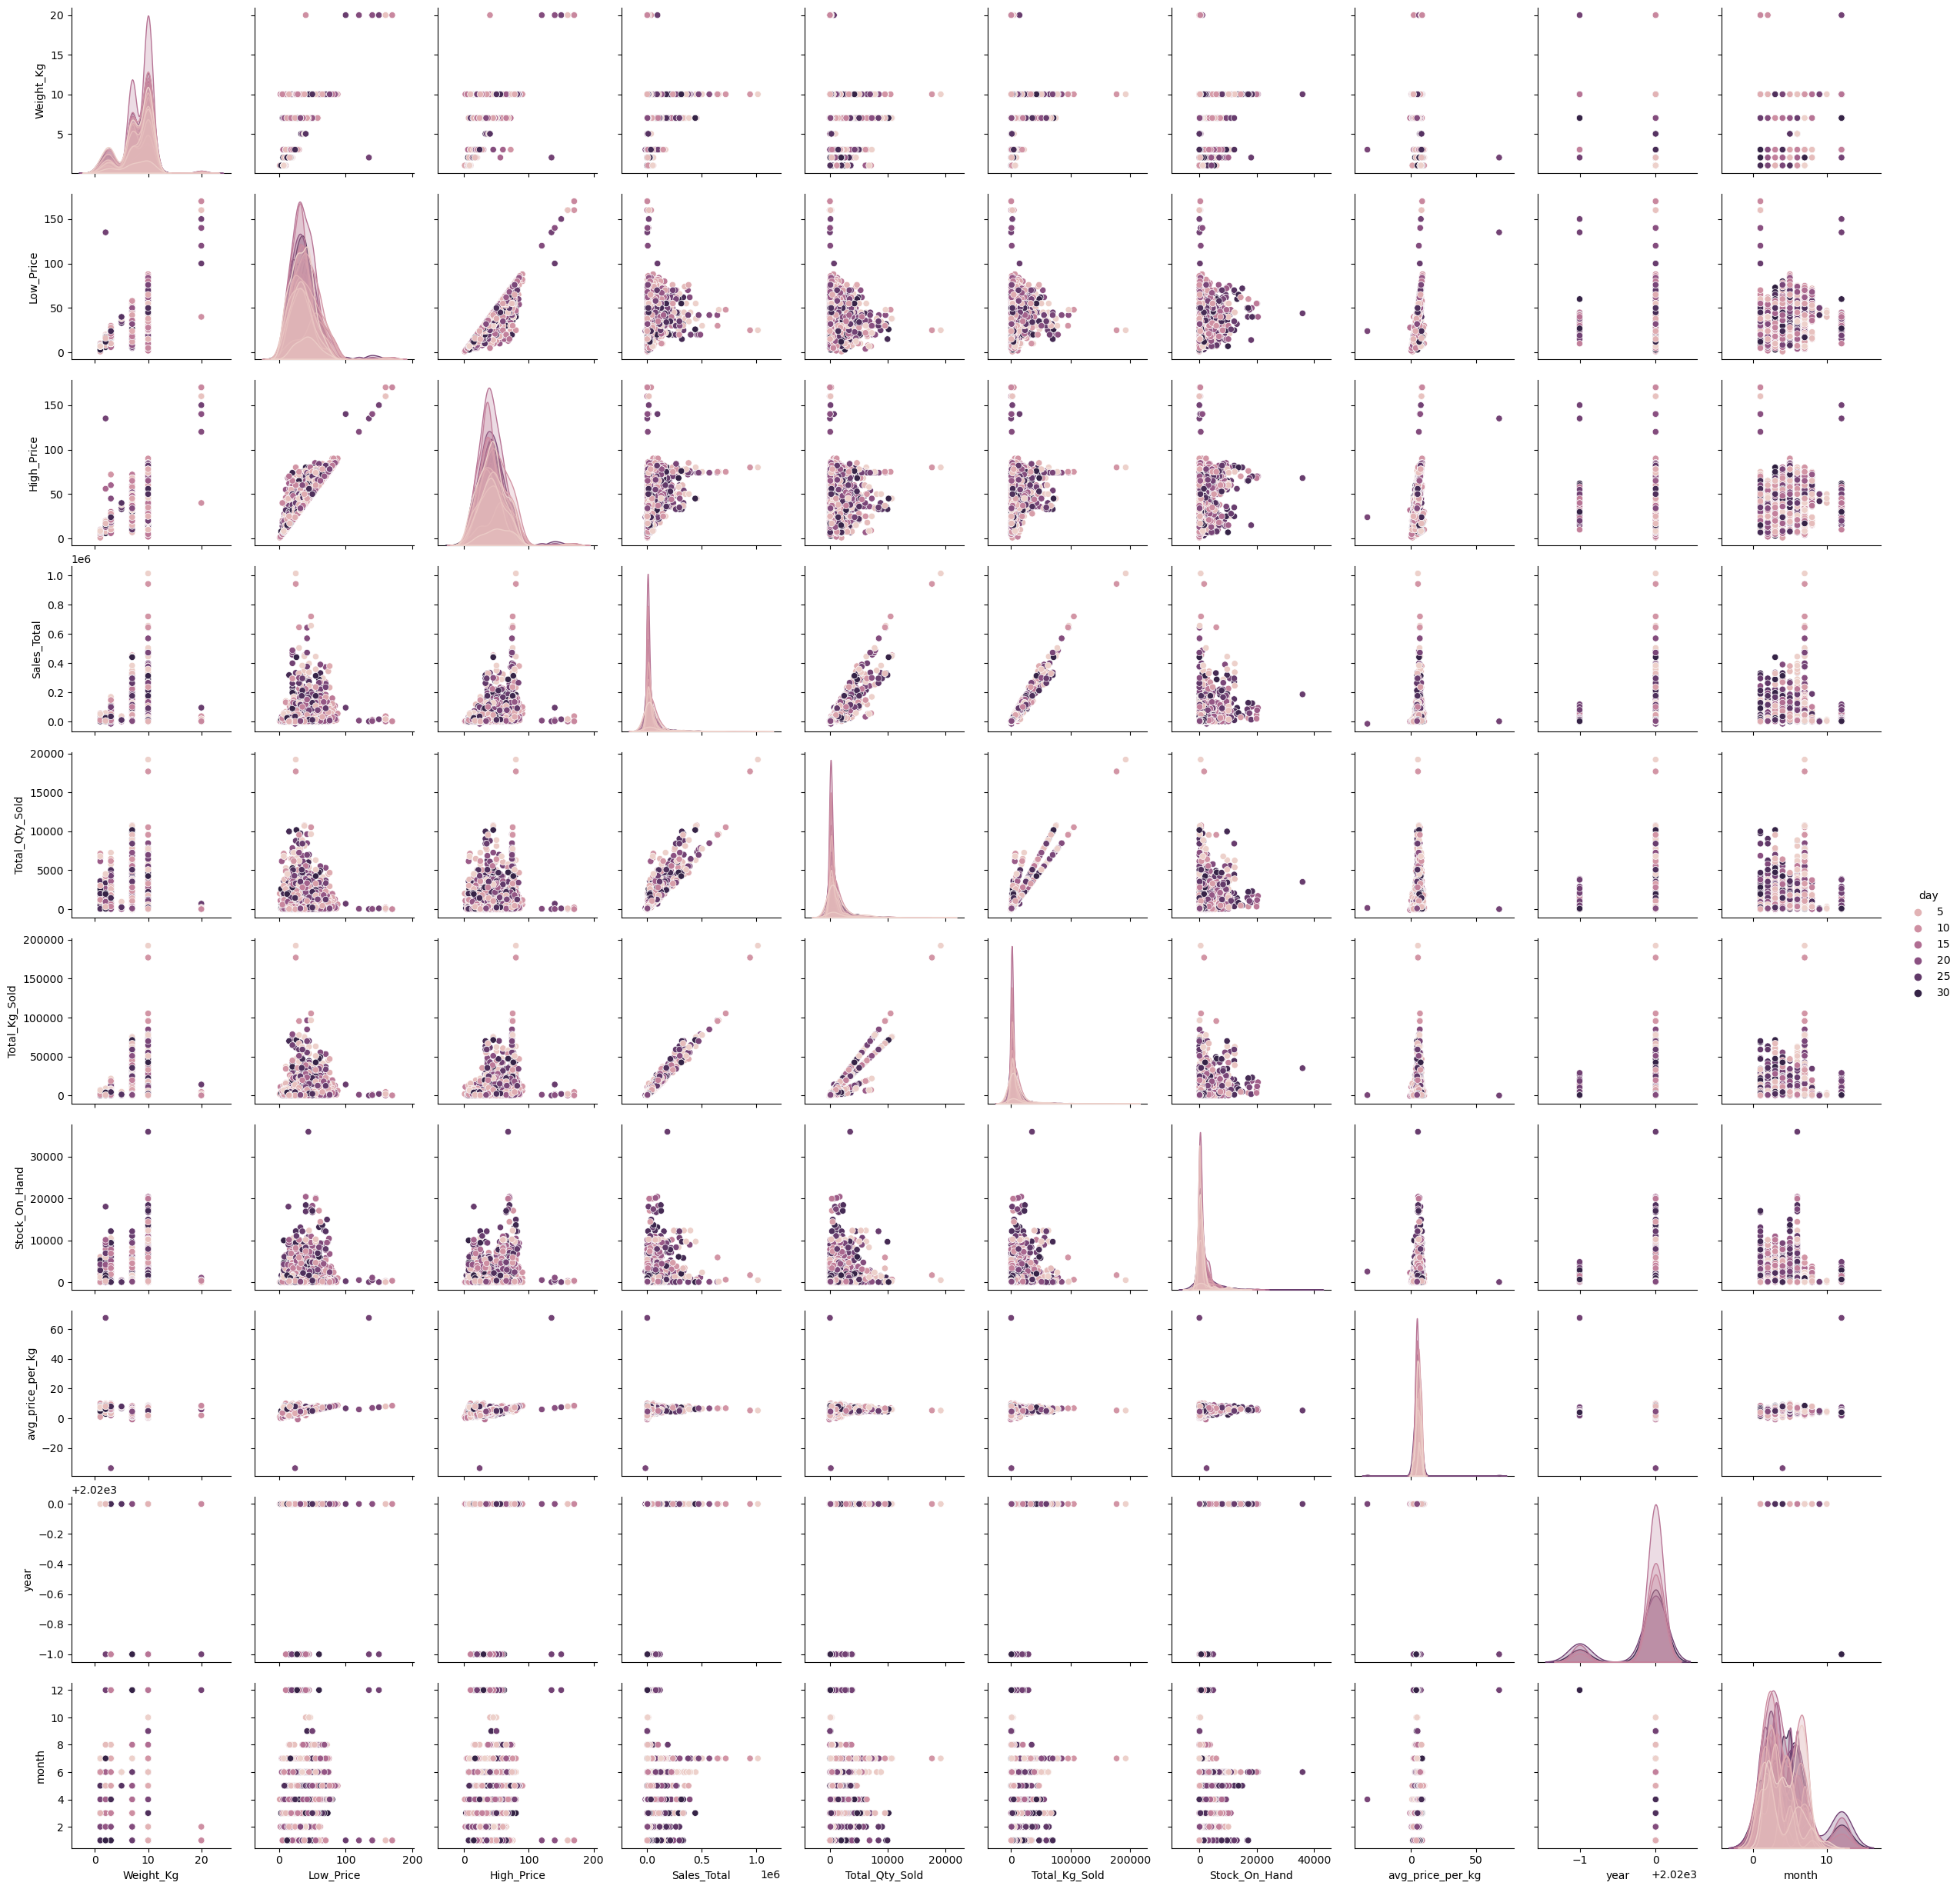

In [29]:
sns.pairplot(brown_onion_df, hue='day')

Check the outliers in numerical columns

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

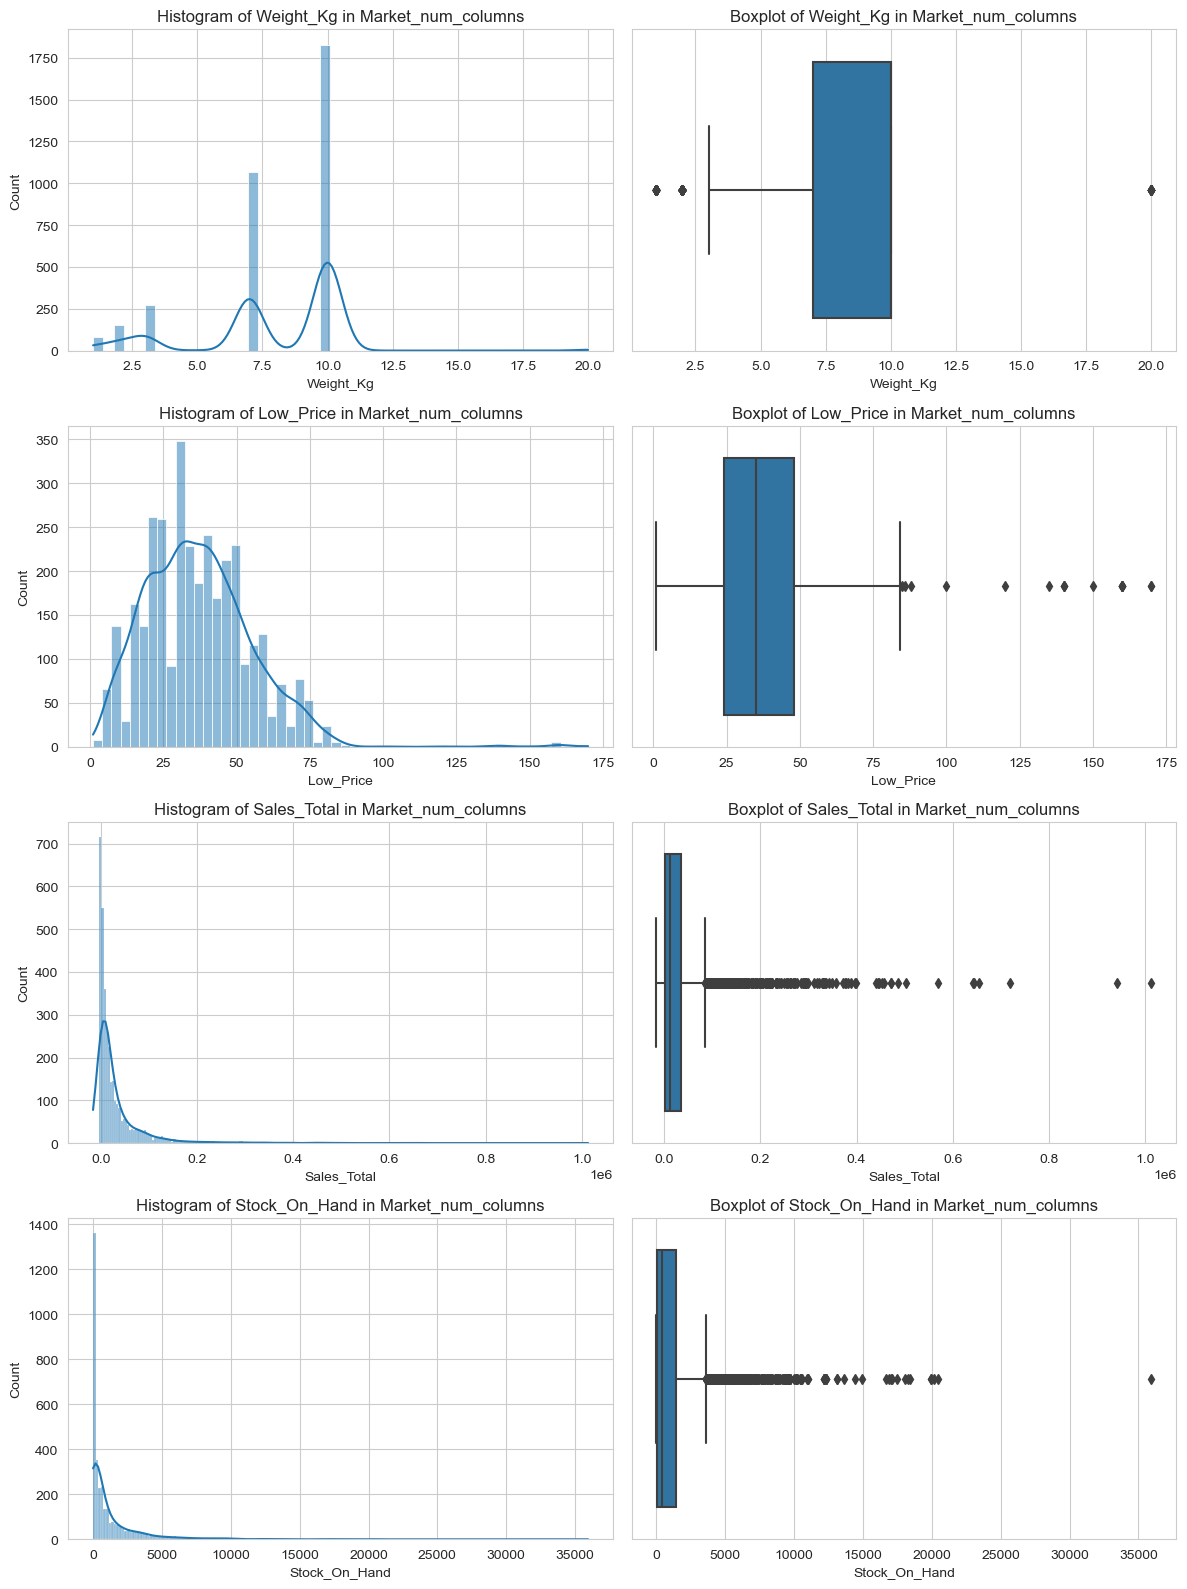

In [30]:
# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Defining a function to create histograms and boxplots for specified columns
def plot_histograms_boxplots(brown_onion_df, columns, dataset_name):
    fig, axes = plt.subplots(len(columns), 2, figsize=(12, 4 * len(columns)))
    for i, col in enumerate(columns):
        # Histogram
        sns.histplot(brown_onion_df[col], kde=True, ax=axes[i, 0])
        axes[i, 0].set_title(f'Histogram of {col} in {dataset_name}')
        # Boxplot
        sns.boxplot(x=brown_onion_df[col], ax=axes[i, 1])
        axes[i, 1].set_title(f'Boxplot of {col} in {dataset_name}')
    plt.tight_layout()

# Columns of interest for both datasets
columns_of_interest = ['Weight_Kg','Low_Price','Sales_Total','Stock_On_Hand']

# Plotting for Mathematics dataset
plot_histograms_boxplots(brown_onion_df, columns_of_interest, 'Market_num_columns')

In [31]:
brown_onion_df = brown_onion_df[(2.5 <= brown_onion_df['Weight_Kg']) & (brown_onion_df['Weight_Kg'] < 20)]
brown_onion_df = brown_onion_df[(0<= brown_onion_df['Low_Price']) & (brown_onion_df['Low_Price'] < 80)]
brown_onion_df = brown_onion_df[(0<= brown_onion_df['Sales_Total']) & (brown_onion_df['Sales_Total'] < 35000)]
brown_onion_df = brown_onion_df[(0<= brown_onion_df['Stock_On_Hand']) & (brown_onion_df['Stock_On_Hand'] < 1600)]

brown_onion_df.shape

(1910, 15)

Scalling the values

In [32]:
for col in brown_onion_df.select_dtypes(include=['object']).columns: 
    label_encoder = preprocessing.LabelEncoder() 
    label_encoder.fit(brown_onion_df[col].unique()) 
    brown_onion_df[col] = label_encoder.transform(brown_onion_df[col])
    print(f'{col} : {brown_onion_df[col].unique()}')

Province : [2 7 4 6 8 1 0 3 5]
Container : [3 2 0 1]
Size_Grade : [ 1  6  5  3  4 11  8  7  2 14 12 10  0 13 15  9]
Commodities : [0]


In [33]:
brown_onion_df.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,year,month,day
19,2,3,1,10.0,0,42.0,45.0,2580.0,58,580.0,132,4.45,2020,2,6
33,7,2,6,7.0,0,24.0,32.0,4666.0,187,1309.0,1042,3.56,2020,2,3
113,7,0,5,3.0,0,24.0,24.0,3864.0,161,483.0,539,8.00,2020,7,18
144,7,3,3,10.0,0,36.0,38.0,3262.0,89,890.0,21,3.67,2020,1,14
192,7,3,4,10.0,0,45.0,50.0,27960.0,615,6150.0,595,4.55,2020,2,21


In [34]:
brown_onion_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1910 entries, 19 to 64363
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Province          1910 non-null   int64  
 1   Container         1910 non-null   int64  
 2   Size_Grade        1910 non-null   int64  
 3   Weight_Kg         1910 non-null   float64
 4   Commodities       1910 non-null   int64  
 5   Low_Price         1910 non-null   float64
 6   High_Price        1910 non-null   float64
 7   Sales_Total       1910 non-null   float64
 8   Total_Qty_Sold    1910 non-null   int64  
 9   Total_Kg_Sold     1910 non-null   float64
 10  Stock_On_Hand     1910 non-null   int64  
 11  avg_price_per_kg  1910 non-null   float64
 12  year              1910 non-null   int64  
 13  month             1910 non-null   int64  
 14  day               1910 non-null   int64  
dtypes: float64(6), int64(9)
memory usage: 238.8 KB


In [35]:
brown_onion_df.columns

Index(['Province', 'Container', 'Size_Grade', 'Weight_Kg', 'Commodities',
       'Low_Price', 'High_Price', 'Sales_Total', 'Total_Qty_Sold',
       'Total_Kg_Sold', 'Stock_On_Hand', 'avg_price_per_kg', 'year', 'month',
       'day'],
      dtype='object')

In [36]:
brown_onion_df=brown_onion_df[['Province', 'Container', 'Size_Grade', 'Weight_Kg','Commodities','Low_Price', 'High_Price', 'Sales_Total',
       'Total_Qty_Sold', 'Total_Kg_Sold', 'Stock_On_Hand', 'avg_price_per_kg','year', 'month', 'day']]

In [37]:
brown_onion_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1910 entries, 19 to 64363
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Province          1910 non-null   int64  
 1   Container         1910 non-null   int64  
 2   Size_Grade        1910 non-null   int64  
 3   Weight_Kg         1910 non-null   float64
 4   Commodities       1910 non-null   int64  
 5   Low_Price         1910 non-null   float64
 6   High_Price        1910 non-null   float64
 7   Sales_Total       1910 non-null   float64
 8   Total_Qty_Sold    1910 non-null   int64  
 9   Total_Kg_Sold     1910 non-null   float64
 10  Stock_On_Hand     1910 non-null   int64  
 11  avg_price_per_kg  1910 non-null   float64
 12  year              1910 non-null   int64  
 13  month             1910 non-null   int64  
 14  day               1910 non-null   int64  
dtypes: float64(6), int64(9)
memory usage: 238.8 KB


In [38]:
brown_onion_df['avg_price_per_kg'].value_counts().sort_values(ascending=False)

avg_price_per_kg
5.00    79
6.00    67
4.00    55
3.00    42
4.50    38
        ..
3.12     1
2.68     1
1.42     1
7.38     1
4.18     1
Name: count, Length: 503, dtype: int64

In [39]:
brown_onion_df = brown_onion_df[brown_onion_df['avg_price_per_kg'] >0]

Colleration heatmap

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


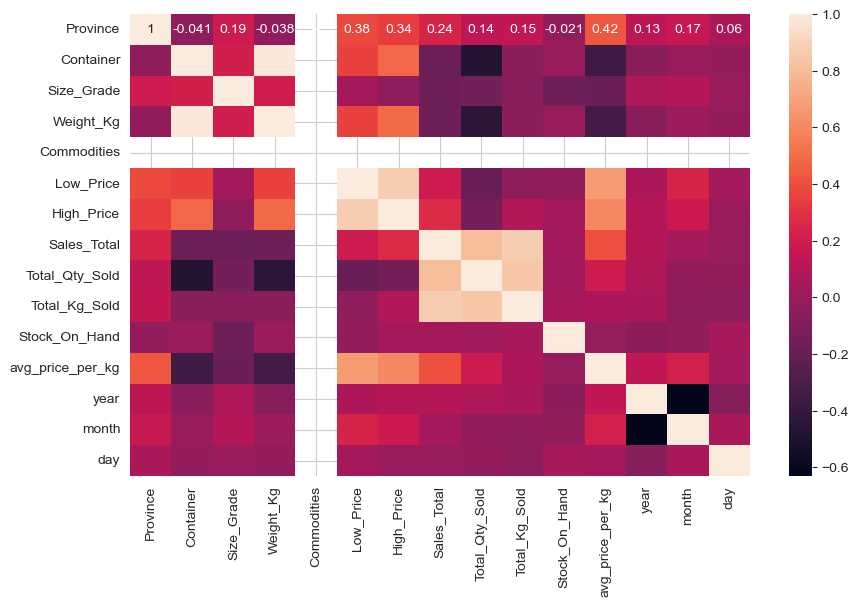

In [40]:
plt.figure(figsize=(10,6))
sns.heatmap(brown_onion_df.corr(),annot=True)
plt.show()

In [41]:
brown_onion_df.drop(['Commodities','year'], axis=1, inplace=True)

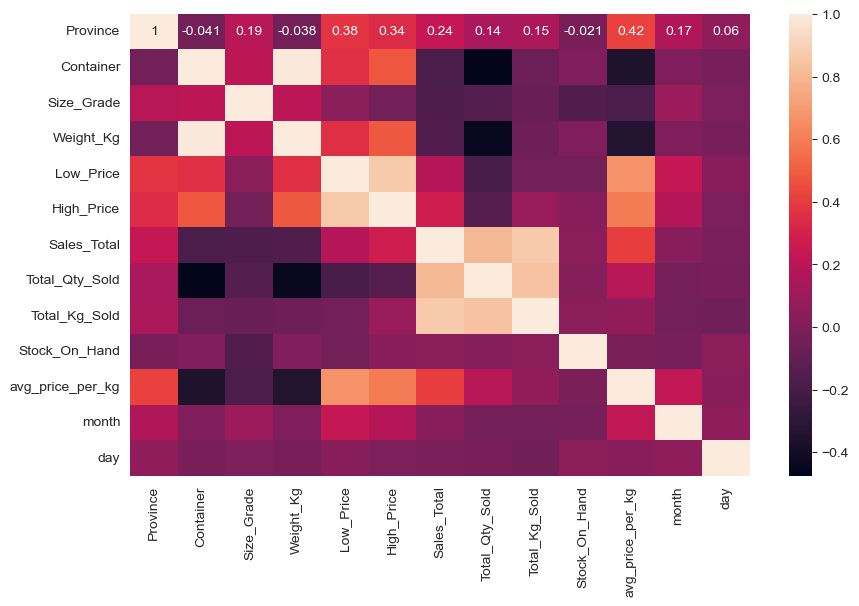

In [42]:
plt.figure(figsize=(10,6))
sns.heatmap(brown_onion_df.corr(),fmt='.2g',annot=True)
plt.show()

In [43]:
brown_onion_df.columns

Index(['Province', 'Container', 'Size_Grade', 'Weight_Kg', 'Low_Price',
       'High_Price', 'Sales_Total', 'Total_Qty_Sold', 'Total_Kg_Sold',
       'Stock_On_Hand', 'avg_price_per_kg', 'month', 'day'],
      dtype='object')

Building models

In [44]:
Y=brown_onion_df['avg_price_per_kg']
X=brown_onion_df.drop(['Container','High_Price','Total_Qty_Sold','Total_Kg_Sold','avg_price_per_kg'], axis=1)

In [45]:
X

,Province,Size_Grade,Weight_Kg,Low_Price,Sales_Total,Stock_On_Hand,month,day
19,2,1,10.0,42.0,2580.0,132,2,6
33,7,6,7.0,24.0,4666.0,1042,2,3
113,7,5,3.0,24.0,3864.0,539,7,18
144,7,3,10.0,36.0,3262.0,21,1,14
192,7,4,10.0,45.0,27960.0,595,2,21
...,...,...,...,...,...,...,...,...
64169,7,11,10.0,50.0,11000.0,361,3,27
64192,6,11,7.0,32.0,5024.0,0,7,1
64320,2,7,7.0,24.0,24.0,307,2,6
64354,2,7,10.0,15.0,525.0,202,2,5


LINEAR REGRESSION MODEL

In [46]:
#split the dataset into test and train dataset
X_test,X_train,Y_test,Y_train=train_test_split(X,Y, test_size=0.2, random_state=42)

#choose the model
lin_model=LinearRegression()

#fit the the train dataset into the model
lin_model.fit(X_train,Y_train)

#predict the model using test dataset
y_pred=lin_model.predict(X_test)

#calculate mean square error on testing data
mse = mean_squared_error(Y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
#accuracy
print("R2 score : %.2f" %r2_score(Y_test,y_pred))


Mean Squared Error: 0.39
R2 score : 0.85


DECISION TREE REGRESSOR MODEL

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#choose the model
dt_model=DecisionTreeRegressor()

#fit the model
dt_model.fit(X_train, y_train)

#predict the model
y_pred=dt_model.predict(X_test)
# calculate the mean squared error on the testing data
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
#accuracy
print("R2 score : %.2f" %r2_score(y_test,y_pred))

Mean Squared Error: 0.29
R2 score : 0.90


BUILDING THE MODEL USING RANDOM FOREST REGRESSOR

In [48]:
#split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=42)

#create and fit the model
rf_model = RandomForestRegressor(n_estimators = 200, max_depth=500)
rf_model=rf_model.fit(X_train, y_train)
#predict the model
y_pred= rf_model.predict(X_test)

print("MSE Score: ", mean_squared_error(y_test, y_pred))
print("R2 score : %.2f" %r2_score(y_test,y_pred))

MSE Score:  0.09376105270287952
R2 score : 0.97


STANDARDIZING THE MODEL

In [49]:
# Apply Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Random Forest model
scaled_rf = RandomForestRegressor(random_state=42)
scaled_rf.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = scaled_rf.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print("R2 score : %.2f" %r2_score(y_test,y_pred))

Mean Squared Error: 0.08965477675392683
R2 score : 0.97


STANDARDIZING THE MODEL USING MINMAX SCALER

In [50]:
# Apply Min max Scaling
min_max_scaler = MinMaxScaler()
X_train_mm_scaled = min_max_scaler.fit_transform(X_train)
X_test_mm_scaled = min_max_scaler.transform(X_test)

# Train the Random Forest model
mm_rf = RandomForestRegressor(random_state=42, max_depth=500)
mm_rf.fit(X_train_mm_scaled, y_train)

# Evaluate the model
y_pred= mm_rf.predict(X_test_mm_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print("R2 score : %.2f" %r2_score(y_test,y_pred))

Mean Squared Error: 0.08874445031413626
R2 score : 0.97


Build Stacked model

In [51]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression

estimator_list = [('lin_model',lin_model),('dt_model',dt_model),('rf_model',rf_model),('scaled_rf',scaled_rf),('mm_rf',mm_rf) ]

# Build stack model
stack_model = StackingRegressor(estimators=estimator_list, final_estimator=LinearRegression())

# Train stacked model
stack_model.fit(X_train, y_train)

# Make predictions
y_train_pred = stack_model.predict(X_train)
y_test_pred = stack_model.predict(X_test)

# Training set model performance
print("MSE Score: ", mean_squared_error(y_test, y_pred))
print("R2 score : %.2f" %r2_score(y_test,y_pred))

MSE Score:  0.08874445031413626
R2 score : 0.97


Based on the results of the stacking model, we can conclude that the MinMax scaling method produced the best performing model.

In [52]:
# Creating a DataFrame to compare actual and predicted values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Displaying the DataFrame
print(comparison_df.head())

       Actual  Predicted
41764    2.20     2.9173
4014     6.00     5.9989
61843    4.64     4.3985
45320    3.00     3.2233
13665    3.00     3.1936


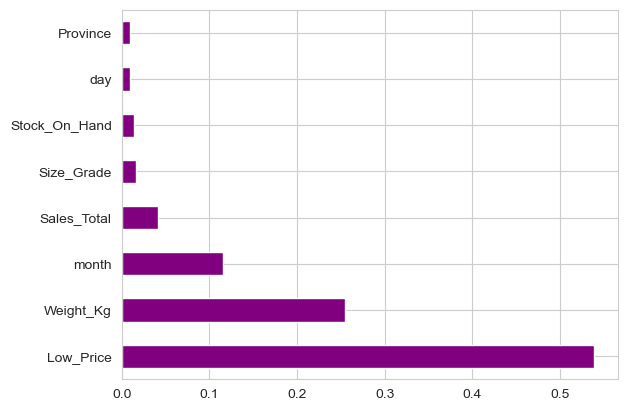

In [53]:
feature_importances = mm_rf.feature_importances_
#plot graph of feature importances for better visualization
feat_importances = pd.Series(mm_rf.feature_importances_, index=X.columns)
feat_importances.nlargest(8).plot(kind='barh', color='purple')
plt.show()

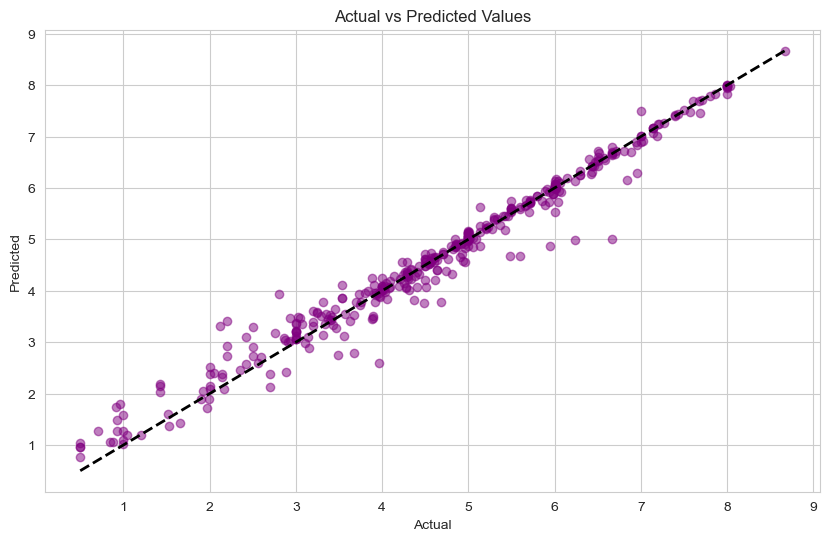

In [54]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='purple', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


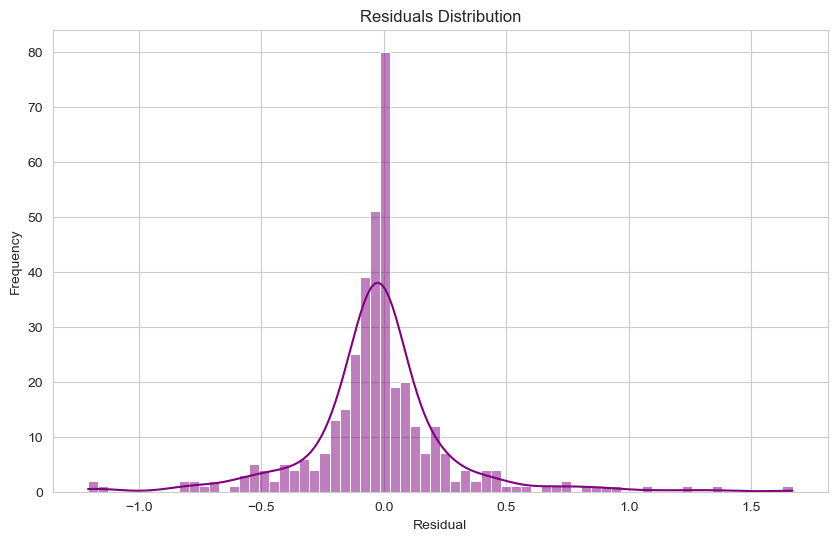

In [55]:
# Plot residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='purple')
plt.title('Residuals Distribution')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

since the residual plot distributed mostly around 0, indicating that the model is unbiased.

In [56]:
#save the file using pickle library
model_save_path = "price_predict_model.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(stack_model,file)